In [576]:
CLIENT_ID = '87c5153b7f74400ab86057e17cd8974a'
CLIENT_SECRET = 'e69632e3ef7448fd847a181730fac26c'
username = 'fv9r6gystti1tplk7pwckqi0e'
scope = 'user-read-recently-played'

token = 'BQC5IhDvlsMO7gOSMGIWi2JO3iiwZTB-vWFl6O4dYBy1wMZJsaQXD8-YjVZjXw0uGf9RjU0gaK7cu8OBMMLTABlvjIOXAdkVoQWdDm5Ehcchh9QyBU7U1Y6N73Ty2pVlcH7I_nVR5qtHJSGwBBeESHkuBcUJDWI'





this above details are user specific and are given by spotify

In [656]:
#basic lib
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
from datetime import datetime
import os
import scipy as sci
import plotly
import stat
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew
from scipy.stats import boxcox 

#scklit learn
import sklearn.preprocessing as pre
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_digits

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, plot_confusion_matrix
from sklearn.metrics import roc_auc_score , roc_curve

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier , OutputCodeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans


#plotly
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)




# spotify 
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# set styles and defaults
pd.set_option('max_columns', None)
pd.set_option('max_rows', 1000)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
sns.set_context('talk')
sns.set_style('whitegrid')
#sns.set_palette('rainbow')
#sns.set(context='talk' , style = 'whitegrid', palette = 'rainbow')
#sns.set_palette("RdPu", 10)


a user defined function to get audio features from spotify

In [657]:
def get_user_playlist(username, playlist_id, sp):
    offset=0
    return sp.user_playlist_tracks(username, playlist_id, limit=100, fields=None, offset=offset, market=None)['items']
     


def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()

    playlist_df['artistName'] = np.array([song['track']["album"]["artists"][0]["name"] for song in playlist_songs])
    
    artistName1 = []
    for i in range(len(playlist_songs)):
        try :
            artistName1 =  artistName1 + [playlist_songs[i]['track']['album']['artists'][1]['name']]
        except IndexError :
            artistName1 =  artistName1 + [playlist_songs[i]['track']['album']['artists'][0]['name']]
    
    playlist_df['artistName_1'] = artistName1
    playlist_df['albumName'] = np.array([song['track']["album"]["name"] for song in playlist_songs])
    playlist_df['trackName'] = np.array([song['track']['name'] for song in playlist_songs])
    playlist_df['release_date'] = np.array([song['track']['album']['release_date'] for song in playlist_songs])
    playlist_df['album_type'] = np.array([song['track']['album']['album_type'] for song in playlist_songs])
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['duration_ms'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    playlist_df['explicit'] = np.array([song['track']['explicit'] for song in playlist_songs])
    playlist_df['popularity'] = np.array([song['track']['popularity'] for song in playlist_songs])
    
    
    
    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])
    playlist_df['liveness'] = np.array([audio_info['liveness'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['speechiness'] = np.array([audio_info['speechiness'] for audio_info in audio_analysis])
    playlist_df['instrumentalness'] = np.array([audio_info['instrumentalness'] for audio_info in audio_analysis])
    playlist_df['key'] = np.array([audio_info['key'] for audio_info in audio_analysis])
    playlist_df['time_signature'] = np.array([audio_info['time_signature'] for audio_info in audio_analysis])
    playlist_df['mode'] = np.array([audio_info['mode'] for audio_info in audio_analysis])


    return playlist_df

In [658]:
l1 = 'aditya'  

imported 5 of my spotify playlists 

In [659]:
play_1 = get_user_playlist(l1 , 'spotify:playlist:6HGQNl2PrATAeVRBrVUQLL',sp) 
p1 = create_dataframe(play_1)
p1['playlist'] = 'rap out'

In [660]:
play_2 = get_user_playlist(l1 , 'spotify:playlist:5bVdbZOiQQ9WW03dejOl38',sp) 
p2 = create_dataframe(play_2)
p2['playlist'] = 'night circus'


In [661]:
play_3 = get_user_playlist(l1 , 'spotify:playlist:5wtV1GqjoGP4tAFxSUAh3f',sp) 
p3 = create_dataframe(play_3)
p3['playlist'] = 'relaxtion'

In [662]:
play_4 = get_user_playlist(l1 , 'spotify:playlist:54fiL5FrdyLw0A0VVk73gs',sp) 
p4 = create_dataframe(play_4)
p4['playlist'] = 'indie hindi'

In [663]:
play_5 = get_user_playlist(l1 , 'spotify:playlist:3RspFggxZHqXQQIsmCQEz8',sp)
p5 = create_dataframe(play_5)
p5['playlist'] = 'mixtape'

In [664]:
# combine into single data frame
play = pd.concat([p1,p2,p3,p4,p5],ignore_index=True)  

# the below gives a descriptions of the columns

# lets do some basic EDA

convert time duration from ms to s

In [666]:
play['duration_m'] = round(play['duration_ms']/60000,2)
play = play.drop('duration_ms',axis=1)

 convert to standered date time format

In [667]:
play['release_date']= pd.to_datetime(play['release_date']) 

classify release date into different deacades in obj form

In [668]:
def time_period(x):
    if x < 1970 : 
        return "1960's"
    elif x < 1980 :
        return "1970's"
    elif x < 1990 :
        return "1980's"
    elif x < 2000 :
        return "1990's"
    elif x < 2010 :
        return "2000's"
    elif x < 2020 :
        return "2010's"
    else :
        return "2020's"

In [669]:
play['decade'] = play.release_date.dt.year.apply(lambda x : time_period(x))

now lets make a copy of the data to test stuff on it 

In [719]:
play.head()
play1 = play.copy()

In [670]:
play.info()  # 0 : minor : sad , major : happy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artistName        238 non-null    object        
 1   artistName_1      238 non-null    object        
 2   albumName         238 non-null    object        
 3   trackName         238 non-null    object        
 4   release_date      238 non-null    datetime64[ns]
 5   album_type        238 non-null    object        
 6   id                238 non-null    object        
 7   explicit          238 non-null    bool          
 8   popularity        238 non-null    int64         
 9   danceability      238 non-null    float64       
 10  loudness          238 non-null    float64       
 11  tempo             238 non-null    float64       
 12  acousticness      238 non-null    float64       
 13  energy            238 non-null    float64       
 14  valence           238 non-

In [676]:
play.describe(include = 'all',datetime_is_numeric=True)

,artistName,artistName_1,albumName,trackName,release_date,album_type,id,explicit,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,instrumentalness,key,time_signature,mode,playlist,duration_m,decade
count,238,238,238,238,238,238,238,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.00000,238,238.000000,238
unique,111,117,187,233,NaN,3,235,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,7
top,Prabh Deep,Sez on the Beat,Vaani | Dhwani | Awaaz,Bismil,NaN,album,556QgSgtBMDIPRDkdRnvxZ,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rap out,NaN,2010's
freq,11,10,8,2,NaN,130,2,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,113
mean,NaN,NaN,NaN,NaN,2009-06-23 17:14:37.310924288,NaN,NaN,NaN,32.903361,0.577240,-9.572819,118.361403,0.402184,0.544692,0.436172,0.179080,0.100219,0.086175,5.159664,3.928571,0.62605,NaN,3.948992,NaN
min,NaN,NaN,NaN,NaN,1958-03-21 00:00:00,NaN,NaN,NaN,0.000000,0.069800,-24.902000,58.739000,0.000155,0.011800,0.029800,0.027300,0.025300,0.000000,0.000000,1.000000,0.00000,NaN,1.510000,NaN
25%,NaN,NaN,NaN,NaN,2007-08-05 18:00:00,NaN,NaN,NaN,0.000000,0.473250,-11.461250,95.645500,0.080150,0.394250,0.209750,0.089775,0.033800,0.000002,2.000000,4.000000,0.00000,NaN,3.127500,NaN
50%,NaN,NaN,NaN,NaN,2018-04-12 00:00:00,NaN,NaN,NaN,29.000000,0.590500,-9.079500,116.596500,0.379500,0.543500,0.416500,0.116500,0.043900,0.000261,5.000000,4.000000,1.00000,NaN,3.710000,NaN
75%,NaN,NaN,NaN,NaN,2019-12-19 06:00:00,NaN,NaN,NaN,61.750000,0.701750,-7.084250,138.007500,0.701000,0.719000,0.629500,0.211750,0.118250,0.012375,9.000000,4.000000,1.00000,NaN,4.465000,NaN
max,NaN,NaN,NaN,NaN,2021-10-15 00:00:00,NaN,NaN,NaN,94.000000,0.949000,-2.371000,194.815000,0.993000,0.949000,0.980000,0.954000,0.522000,0.950000,11.000000,5.000000,1.00000,NaN,11.820000,NaN


In [677]:
#def OnehotEncoding(original_dataframe, feature_to_encode):
#    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#    play_ohe = pd.concat([original_dataframe, dummies], axis=1)
#    return(play_ohe)
#play_ohe = OnehotEncoding(play , 'playlist')

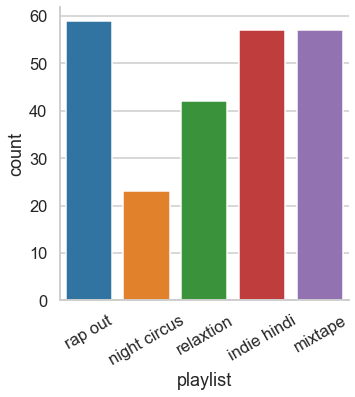

In [678]:
ax = sns.catplot(data = play, x = 'playlist', kind = 'count')
ax.set_xticklabels(rotation=30)


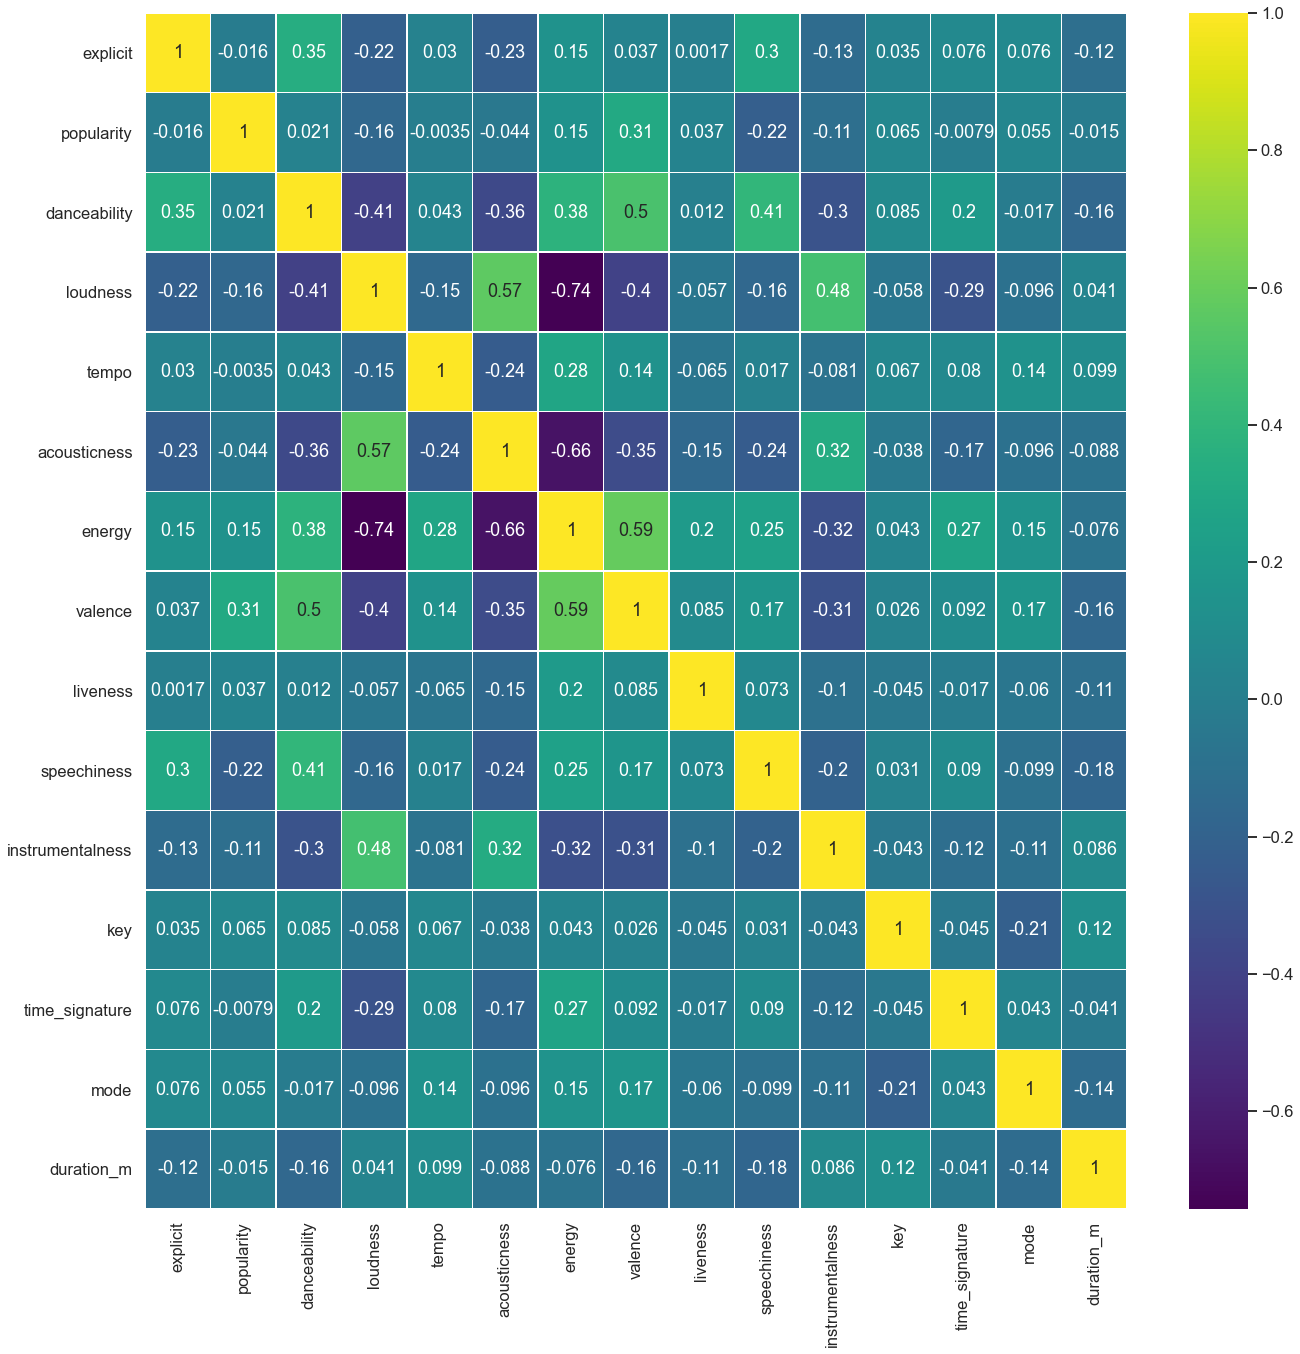

In [595]:
#corremat = play.corr()      # plot heatmap 
plt.figure(figsize=(22,22))
g= sns.heatmap(play.corr(),annot=True,cmap='viridis',linewidths=.5)

# find skewness of data

dealing with diff methods of handling skewed data . 

mostly we use log or square root and and statistical method of box cox

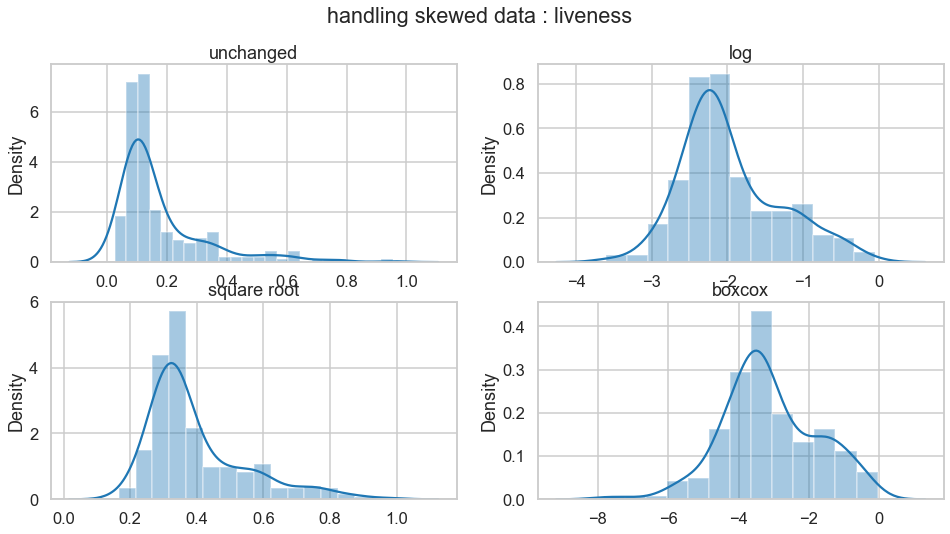

the skewness for 
original is  2.2086313659566814
log is 0.6825704002966201
sqrt is 1.4398113549421678
boxcox is 0.009556090487268852


In [596]:
fig, axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle('handling skewed data : liveness ')

sns.distplot(play.liveness,ax=axes[0,0]).set(xlabel=None)#hue = 'playlist'
axes[0,0].set_title('unchanged')

sns.distplot( np.log(play.liveness),ax=axes[0,1]).set(xlabel=None)
axes[0,1].set_title('log')

sns.distplot(np.sqrt(play.liveness),ax=axes[1,0]).set(xlabel=None)
axes[1,0].set_title('square root')

boc,lmbda=sci.stats.boxcox(play.liveness,lmbda=None)
sns.distplot( boc,ax=axes[1,1]).set(xlabel=None)
axes[1,1].set_title('boxcox')

plt.show()
print('the skewness for ')
print('original is ',skew(play.liveness))
print('log is',skew(np.log(play.liveness)),)
print('sqrt is',skew(np.sqrt(play.liveness)),)
boc,lmbda=boxcox(play.liveness,lmbda=None)
print('boxcox is',skew(boc))

In [597]:
comp = play.select_dtypes(include='float64').apply(lambda x : 
                                    [sci.stats.skew(x),
                                     sci.stats.kurtosis(x),
                                     x.mean(),x.median()]).T

comp.columns = ['skewness','kurtosis','mean','median']
comp
#play.select_dtypes(include='float64').skew().sort_values(ascending=False)

,skewness,kurtosis,mean,median
danceability,-0.334049,-0.165710,0.577240,0.590500
loudness,1.197815,2.112626,9.572819,9.079500
tempo,0.312953,-0.606904,118.361403,116.596500
acousticness,0.312808,-1.334130,0.402184,0.379500
energy,-0.197718,-0.737794,0.544692,0.543500
valence,0.290709,-0.936909,0.436172,0.416500
liveness,2.208631,5.265856,0.179080,0.116500
speechiness,1.819693,2.498768,0.100219,0.043900
instrumentalness,2.800571,6.460516,0.086175,0.000261
duration_m,1.871065,6.760052,3.948992,3.710000


In [598]:
#sns.pairplot(play, hue='playlist')

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

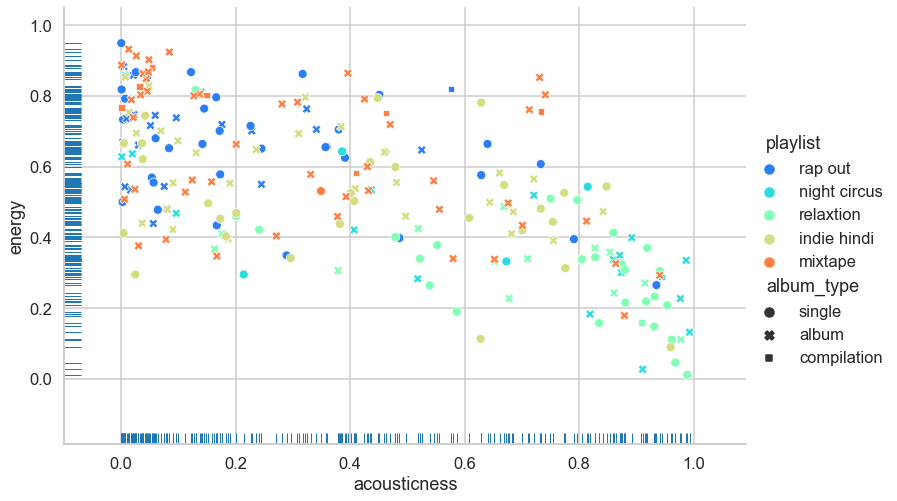

In [599]:
sns.relplot(data = play , y = 'energy' , x = 'acousticness', hue = 'playlist',style='album_type',
            height = 7 , aspect=1.5 , palette = 'rainbow')
sns.rugplot(data = play , y = 'energy' , x = 'acousticness' )

In [600]:
round(play.groupby(['mode','playlist'])['key'].count()/play.groupby('playlist')['playlist'].count() * 100)

mode  playlist    
0     indie hindi     25.0
      mixtape         30.0
      night circus    26.0
      rap out         44.0
      relaxtion       62.0
1     indie hindi     75.0
      mixtape         70.0
      night circus    74.0
      rap out         56.0
      relaxtion       38.0
dtype: float64

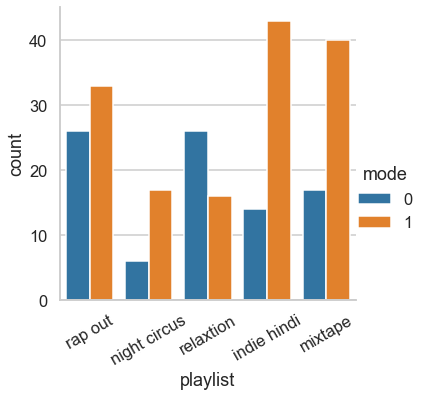

In [601]:
ax = sns.catplot(data = play, x = 'playlist', kind = 'count', hue = 'mode')
ax.set_xticklabels(rotation=30)


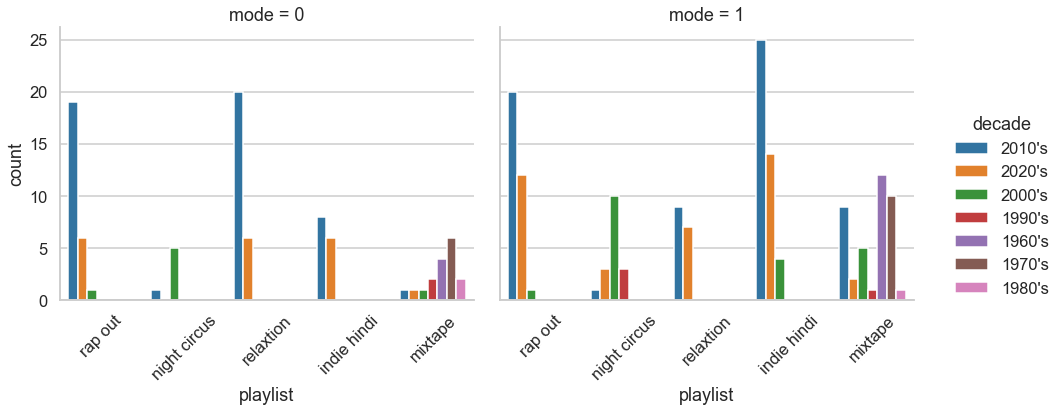

In [602]:
ax = sns.catplot(data = play ,  x = 'playlist'  , kind = 'count', hue = 'decade' , col = 'mode')
ax.set_xticklabels(rotation=45)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(5)

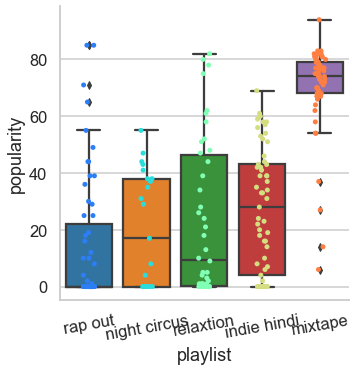

In [603]:

ax = sns.catplot(data = play , y ='popularity' , x = 'playlist' , kind = 'box' )
sns.stripplot(data = play , y = 'popularity', x = 'playlist',palette='rainbow')
ax.set_xticklabels(rotation=10)
#ax.fig.set_figwidth(8)
#ax.fig.set_figheight(5)

#t1 = go.Box(y = play.danceability, name = 'danceability' , text = play.trackName,color = 'explicit')
#data = [t1]
#iplot(data)

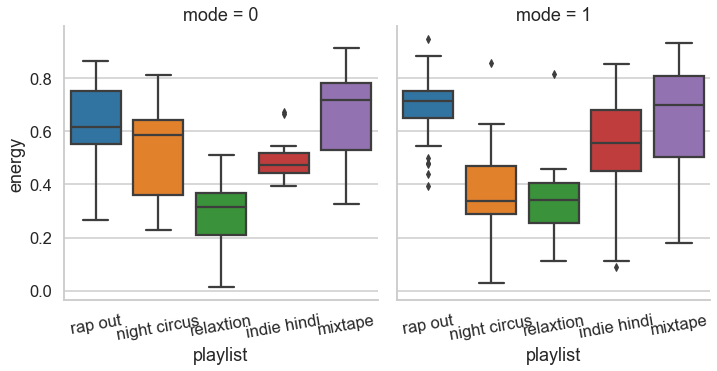

In [604]:
ax = sns.catplot(data = play , y ='energy' , x = 'playlist', col = 'mode' , kind = 'box' )
ax.set_xticklabels(rotation=10)

In [605]:
fig = px.box(play, color='playlist', y='popularity',points="all")
fig.show()
#ax = sns.catplot(data = play , y ='popularity' , x = 'playlist' , kind = 'box' )
#sns.stripplot(data = play , y = 'popularity', x = 'playlist',palette='rainbow')
#ax.set_xticklabels(rotation=10)

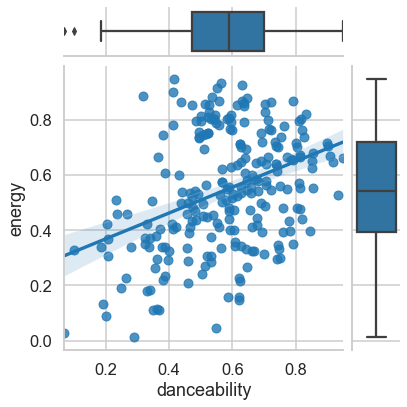

In [606]:
#ax = sns.displot(data = play ,  x = 'speechiness', kind = 'hist', col = 'playlist' , y = 'energy', aspect = 0.8)
g = sns.JointGrid(data=play, x="danceability", y="energy" )
g.plot_joint(sns.regplot)
g.plot_marginals(sns.boxplot)

In [728]:

t1 = play[play.playlist == 'relaxtion']
trace1 = go.Scatter(y = t1.energy , x = t1.acousticness,
                    mode = "markers",
                    name = "relaxtion",
                    text= t1.trackName )

t2 = play[play.playlist == 'night circus']
trace2 = go.Scatter(y = t2.energy , x = t2.acousticness,
                    mode = "markers",
                    name = "night circus",
                    text= t2.trackName )

t3 = play[play.playlist == 'mixtape']
trace3 = go.Scatter(y = t3.energy , x = t3.acousticness,
                    mode = "markers",
                    name = "mixtape",
                    text= t3.trackName )

t4 = play[play.playlist == 'rap out']
trace4 = go.Scatter(y = t4.energy , x = t4.acousticness,
                    mode = "markers",
                    name = "rap out",
                    text= t4.trackName )

t5 = play[play.playlist == 'indie hindi']
trace5 = go.Scatter(y = t5.energy , x = t5.acousticness,
                    mode = "markers",
                    name = "indie hindi",
                    text= t5.trackName )


data = [trace1 , trace2 , trace3 , trace4 , trace5 ]

layout = dict(title = ' acousticness v/s energy ',
              xaxis= dict(title= 'acousticness',ticklen= 5),
              yaxis= dict(title= 'energy',ticklen= 5))

fig= dict(data = data,layout=layout)
iplot(fig)


In [608]:
play.head(3)

,artistName,artistName_1,albumName,trackName,release_date,album_type,id,explicit,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,instrumentalness,key,time_signature,mode,playlist,duration_m,decade
0,Prabh Deep,Prabh Deep,Maya,Maya,2019-05-13,single,5eR1O5GNIN7kTtfxgg2NFh,False,0,0.852,4.747,139.995,0.391,0.625,0.640,0.109,0.242,0.000053,9,4,0,rap out,4.57,2010's
1,Prabh Deep,Prabh Deep,Amar,Amar,2019-06-19,single,57onkj1hvlwkekdwo6LlCf,False,0,0.772,7.664,96.203,0.640,0.664,0.389,0.110,0.321,0.000003,1,4,0,rap out,4.55,2010's
2,Prabh Deep,Prabh Deep,Kala,Kala,2019-06-03,single,4rTVcvaTwgYVb1bKxePYzF,False,0,0.760,13.771,114.966,0.791,0.395,0.904,0.111,0.484,0.000000,8,4,1,rap out,3.51,2010's


# radar plot comparing two variables

In [729]:
x0 = "Cinder and Smoke"
#x = play[play.playlist == x0 ]
#x = play[play['decade'] == x0]
x = play[play.trackName == x0]

y0 = "Blue Monday"
#y = play[play.playlist == y0 ]   
#y = play[play['decade'] == y0]
y = play[play.trackName == y0]



def radar_plot(x , x0 , y , y0) : 
    
    t1 = go.Scatterpolar(r = [ x['acousticness'].mean() ,
                           x['instrumentalness'].mean() ,
                           x['danceability'].mean() , 
                           x['energy'].mean() ,
                           x['valence'].mean() ,
                           x['speechiness'].mean() ,
                           x['acousticness'].mean() ] ,
                    theta = ['acousticness','instrumentalness','danceability','energy','valence','speechiness','acousticness'],
                    fill = 'toself' , name  = x0)
    
    t2 = go.Scatterpolar(r = [ y['acousticness'].mean() ,
                           y['instrumentalness'].mean() ,
                           y['danceability'].mean() , 
                           y['energy'].mean() ,
                           y['valence'].mean() ,
                           y['speechiness'].mean() ,
                           y['acousticness'].mean() ],
                    theta = ['acousticness','instrumentalness','danceability','energy','valence','speechiness','acousticness'],
                    fill = 'toself' , name  = y0 )


    data = [t1,t2]
    layout = go.Layout( polar = dict ( radialaxis = dict( visible = True , range = [0, 1] ) ), 
                                 title = 'Mixtape v/s indie hindi' ) 

    fig = go.Figure(data=data, layout=layout)
    return iplot(fig)

In [730]:
radar_plot(x , x0 , y , y0)

In [611]:
test = play[play.playlist == 'night circus']
t1 = go.Box(y = test.danceability, name = 'danceability' , text = test.trackName,boxpoints="all")
#t2 = go.Box(y = test.loudness, name = 'loudness' , text = test.trackName)
t3 = go.Box(y = test.acousticness, name = 'acousticness' , text = test.trackName,boxpoints="all")
t4 = go.Box(y = test.energy, name = 'energy' , text = test.trackName,boxpoints="all" )
t5 = go.Box(y = test.valence, name = 'valence' , text = test.trackName,boxpoints="all")
t6 = go.Box(y = test.speechiness, name = 'speechiness' , text = test.trackName,boxpoints="all")
#t7 = go.Box(y = test.duration_m, name = 'duration_m' , text = test.trackName)
#t8 = go.Box(y = test.tempo, name = 'tempo' , text = test.trackName)
t9 = go.Box(y = test.instrumentalness, name = 'instrumentalness' , text = test.trackName,boxpoints="all")
data = [t1,t3,t4,t5,t6,t9]
layout = go.Layout( title = test.playlist.values[0] + ' analysis' )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [612]:
fig = px.sunburst(play, path=['playlist', 'mode' , 'key' ], values='duration_m')
fig.show()

In [735]:
play1.head()

,artistName,artistName_1,albumName,trackName,release_date,album_type,id,explicit,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,instrumentalness,key,time_signature,mode,playlist,duration_m,decade
0,Prabh Deep,Prabh Deep,Maya,Maya,2019-05-13,single,5eR1O5GNIN7kTtfxgg2NFh,False,0,0.852,1.909098,139.995,0.3910,0.625,0.640,-2.216407,-1.418818,0.405500,9,4,0,rap out,4.57,2010's
1,Prabh Deep,Prabh Deep,Amar,Amar,2019-06-19,single,57onkj1hvlwkekdwo6LlCf,False,0,0.772,2.268408,96.203,0.6400,0.664,0.389,-2.207275,-1.136314,0.405467,1,4,0,rap out,4.55,2010's
2,Prabh Deep,Prabh Deep,Kala,Kala,2019-06-03,single,4rTVcvaTwgYVb1bKxePYzF,False,0,0.760,2.758173,114.966,0.7910,0.395,0.904,-2.198225,-0.725670,0.405465,8,4,1,rap out,3.51,2010's
3,Seedhe Maut,Sez on the Beat,Seedhe Maut Anthem,Seedhe Maut Anthem,2017-05-08,single,1NCFfVKuurzwgQTmExIAoN,False,25,0.811,2.209592,82.909,0.0535,0.569,0.342,-1.703749,-1.108663,0.405470,6,4,0,rap out,3.30,2010's
4,Seedhe Maut,Sez on the Beat,Bayaan,Dehshat,2018-12-28,album,6MagUZrZrgQzxcdodhl32b,False,0,0.736,2.224948,153.781,0.1760,0.719,0.252,-2.407946,-1.546463,0.405465,10,4,0,rap out,2.94,2010's


# Transforming the data

In [708]:
def transform(x):
    if skew(x) > 1 :
        if pd.Series(x<=0).any() :
            x = np.log(x+1.5)
            #print('significantly positive skewed with 0 values')
        else :
            x = np.log(x)
            #print('significantly positive skewed')
    elif skew(x) > 0.5  :
        x = np.sqrt(x)
        #print('moderately positive skewed')
    elif skew(x) < -1 :
        x = np.log(2-x)
        #print('significantly negetive skewed')
    elif skew(x) < -0.5 :
        x = np.sqrt(2-x)
        #print('moderately negetive skewed')
    else :
        None 
        #print('approx symmetric')
    
    return x


In [721]:
cols = play.select_dtypes(include='float64')
cols = cols.drop('duration_m',axis=1)
cols = cols.apply(lambda x : transform(x))
play1[cols.columns] = cols

this is different transformation method : Box Cox

In [722]:
def transform1(x):
    if pd.Series(x<=0).any() :
        x = np.log(x+1.5)
    else :
        if skew(x) > 0.5 or skew(x) < -0.5 :
            bcx,lmbda = boxcox(play.liveness,lmbda=None)
            x = bcx
        else : 
            x = x 
    return x

# lets preprocess the data first

seperating target and independent variables

In [801]:
X = play1.select_dtypes(exclude=['object']) 
X = X.drop('release_date',axis=1)
y = play1['playlist']

Label encoders

In [802]:
le = LabelEncoder()
oe = OrdinalEncoder()
scaler = MinMaxScaler() 

In [803]:
object_cols = ['albumName','artistName','album_type','decade',]
play_oe = pd.DataFrame(oe.fit_transform(play[object_cols]))
X[object_cols] = play_oe

In [804]:
y_le = le.fit_transform(y) # inverse_transforms


Scaling the data

In [779]:
#col = ['loudness','tempo',]
#X_normalized = scaler.fit_transform(play[col])
#X[col] = X_normalized


# train test split

In [780]:

#skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
#for train_index, test_index in skf.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)


In [781]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=5 , stratify = y )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(159, 19)
(159,)
(79, 19)
(79,)


# now apply machine learning models to it 

In [782]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean() , cv_results.std()))


LR: 0.693174 (0.034652)
LDA: 0.668174 (0.067620)
KNN: 0.525443 (0.038036)
CART: 0.654965 (0.052446)
NB: 0.622429 (0.067400)
SVM: 0.445213 (0.030865)


In [783]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [784]:
#score_dataset(X_train, X_test, y_train, y_test)

# lets start with kmeans

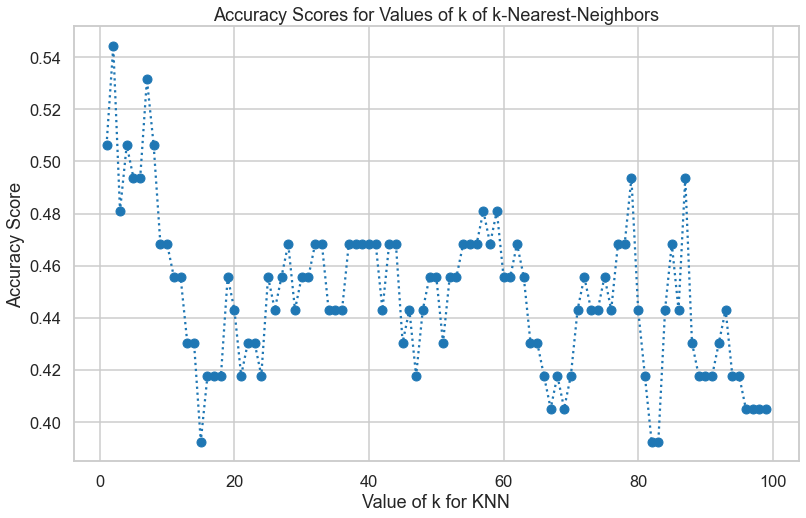

In [785]:
k_range = list(range(1,100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(13,8))   
plt.plot(k_range, scores,linestyle = 'dotted', marker = 'o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

              precision    recall  f1-score   support

 indie hindi       0.38      0.42      0.40        19
     mixtape       0.72      0.95      0.82        19
night circus       0.33      0.25      0.29         8
     rap out       0.45      0.47      0.46        19
   relaxtion       0.71      0.36      0.48        14

    accuracy                           0.53        79
   macro avg       0.52      0.49      0.49        79
weighted avg       0.53      0.53      0.52        79



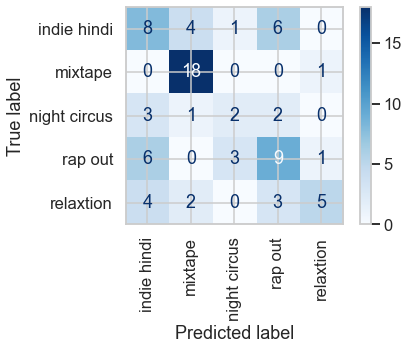

In [788]:
model = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
pred = model.predict(X_test)
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues,xticks_rotation='vertical')
print(classification_report(y_test,pred))

# DecisionTreeClassifier

In [806]:
#error_rate=[]
#for i in range(1,100):
#            knn = DecisionTreeClassifier(max_depth=i)
#            model = knn.fit(X_train,y_train)
#            pred_i = knn.predict(X_test)
#            error_rate.append(np.mean(pred_i != y_test))
#plt.figure(figsize=(13,8))
#plt.plot(range(1,100), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
#plt.xlabel('K value')
#plt.ylabel('Error Rate')
#plt.title('K value Vs Error Rate')
#plt.show() 

              precision    recall  f1-score   support

 indie hindi       0.52      0.63      0.57        19
     mixtape       0.83      0.53      0.65        19
night circus       1.00      0.62      0.77         8
     rap out       0.72      0.68      0.70        19
   relaxtion       0.52      0.79      0.63        14

    accuracy                           0.65        79
   macro avg       0.72      0.65      0.66        79
weighted avg       0.69      0.65      0.65        79



0.6455696202531646

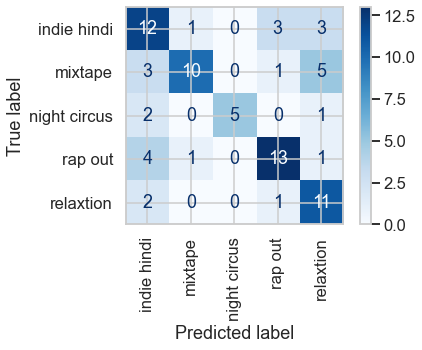

In [793]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
pred = model.predict(X_test)
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues,xticks_rotation='vertical')
print(classification_report(y_test,pred))
metrics.accuracy_score(y_test, pred)



# logistic regression

              precision    recall  f1-score   support

 indie hindi       0.78      0.37      0.50        19
     mixtape       0.76      1.00      0.86        19
night circus       0.50      0.38      0.43         8
     rap out       0.81      0.89      0.85        19
   relaxtion       0.50      0.64      0.56        14

    accuracy                           0.70        79
   macro avg       0.67      0.66      0.64        79
weighted avg       0.70      0.70      0.68        79



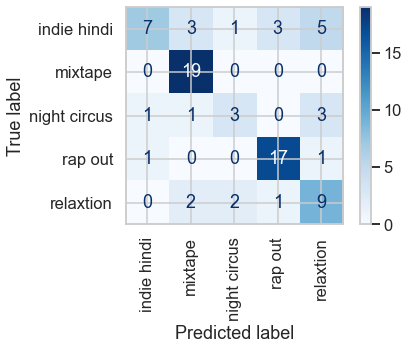

In [805]:
model = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train,y_train)
pred = model.predict(X_test)
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues,xticks_rotation='vertical')
print(classification_report(y_test,pred))
#print(metrics.accuracy_score(y_test, pred))

# naive bayes

              precision    recall  f1-score   support

 indie hindi       0.42      0.84      0.56        19
     mixtape       1.00      0.74      0.85        19
night circus       0.33      0.38      0.35         8
     rap out       0.92      0.63      0.75        19
   relaxtion       0.40      0.14      0.21        14

    accuracy                           0.59        79
   macro avg       0.62      0.55      0.54        79
weighted avg       0.67      0.59      0.59        79



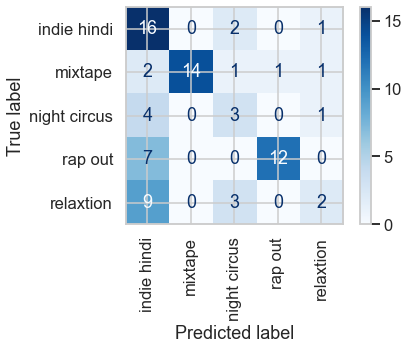

In [807]:
model = GaussianNB().fit(X_train, y_train)
pred = model.predict(X_test)
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues,xticks_rotation='vertical')
print(classification_report(y_test,pred))

In [808]:
GaussianNB?